In [1]:
from platform import python_version
python_version()

'3.7.4'

In [2]:
!jupyter --version

jupyter core     : 4.5.0
jupyter-notebook : 6.0.1
qtconsole        : 4.5.5
ipython          : 7.8.0
ipykernel        : 5.1.2
jupyter client   : 5.3.3
jupyter lab      : 1.1.4
nbconvert        : 5.6.0
ipywidgets       : 7.5.1
nbformat         : 4.4.0
traitlets        : 4.3.3


In [3]:
#importing libraries
import pandas as pd                               
import matplotlib.pyplot as plt                   
import seaborn as sB                              
import numpy as np   
import csv
import math
from sklearn.preprocessing import StandardScaler  
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm
#loading in data
df2=pd.read_csv("D:\code\School\D207\medical_clean.csv")

In [4]:
#creating a copy of the data
df = df2.copy()
#viewing dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#inspecting data types
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [6]:
#using identifiers to remove any duplicates
df= df.drop_duplicates(['Interaction', 'UID'])
#dropping columns not used in analysis
df = df.drop(['CaseOrder', 'Population', 'Area', 'State', 'Customer_id','Interaction', 'UID', 'City', 
              'County', 'Zip', 'TimeZone', 
                'Job', 'Children', 'Marital',  'Full_meals_eaten',
                'vitD_supp', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
              'Item6', 'Item7', 'Item8', 'Income', 
             'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
             'Reflux_esophagitis', 'Services', 'Additional_charges'], axis=1)

In [7]:
#looking at correlation between variables
df.corr()

,Lat,Lng,Age,VitD_levels,Doc_visits,Initial_days,TotalCharge
Lat,1.000000,-0.112348,-0.007270,0.001493,0.008380,-0.008820,-0.010759
Lng,-0.112348,1.000000,0.007493,-0.006389,0.000754,-0.009292,-0.008830
Age,-0.007270,0.007493,1.000000,0.010315,0.006898,0.016264,0.016876
VitD_levels,0.001493,-0.006389,0.010315,1.000000,0.010210,-0.003642,-0.001403
Doc_visits,0.008380,0.000754,0.006898,0.010210,1.000000,-0.006754,-0.005043
Initial_days,-0.008820,-0.009292,0.016264,-0.003642,-0.006754,1.000000,0.987640
TotalCharge,-0.010759,-0.008830,0.016876,-0.001403,-0.005043,0.987640,1.000000


In [8]:
#inspecting data types 
df.dtypes

Lat                  float64
Lng                  float64
Age                    int64
Gender                object
ReAdmis               object
VitD_levels          float64
Doc_visits             int64
Soft_drink            object
Initial_admin         object
HighBlood             object
Stroke                object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Asthma                object
Initial_days         float64
TotalCharge          float64
dtype: object

In [9]:
#no changes necessary

In [10]:
#checking summary statistics to look for outliers
df.describe()

,Lat,Lng,Age,VitD_levels,Doc_visits,Initial_days,TotalCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.751099,-91.243080,53.511700,17.964262,5.012200,34.455299,5312.172769
std,5.403085,15.205998,20.638538,2.017231,1.045734,26.309341,2180.393838
min,17.967190,-174.209700,18.000000,9.806483,1.000000,1.001981,1938.312067
25%,35.255120,-97.352982,36.000000,16.626439,4.000000,7.896215,3179.374015
50%,39.419355,-88.397230,53.000000,17.951122,5.000000,35.836244,5213.952000
75%,42.044175,-80.438050,71.000000,19.347963,6.000000,61.161020,7459.699750
max,70.560990,-65.290170,89.000000,26.394449,9.000000,71.981490,9180.728000


In [11]:
#calculating IQR
age_IQR = (71- 36) * 1.5
print(age_IQR)

52.5


In [12]:
#calculating max and min to remove outliers
age_min = 36 - 52.5 
age_max = 71 + 52.5
print(age_min, age_max)

-16.5 123.5


In [13]:
#no outliers for age

In [14]:
#calculating IQR
Initial_days_IQR = 61.16 - 7.89
print(Initial_days_IQR)

53.269999999999996


In [15]:
#calculating max and min to remove outliers
Initial_days_min = 7.89 - 53.27
Initial_days_max = 61.16 + 53.27
print(Initial_days_min, Initial_days_max)

-45.38 114.43


In [16]:
#getting dummies for categorical variables
df = pd.get_dummies(df)
#viewing updated dataframe
df.head()

,Lat,Lng,Age,VitD_levels,Doc_visits,Initial_days,TotalCharge,Gender_Female,Gender_Male,Gender_Nonbinary,...,Complication_risk_Low,Complication_risk_Medium,Overweight_No,Overweight_Yes,Arthritis_No,Arthritis_Yes,Diabetes_No,Diabetes_Yes,Asthma_No,Asthma_Yes
0,34.34960,-86.72508,53,19.141466,6,10.585770,3726.702860,0,1,0,...,0,1,1,0,0,1,0,1,0,1
1,30.84513,-85.22907,51,18.940352,4,15.129562,4193.190458,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,43.54321,-96.63772,53,18.057507,4,4.772177,2434.234222,1,0,0,...,0,1,0,1,1,0,0,1,1,0
3,43.89744,-93.51479,78,16.576858,4,1.714879,2127.830423,0,1,0,...,0,1,1,0,0,1,1,0,0,1
4,37.59894,-76.88958,22,17.439069,5,1.254807,2113.073274,1,0,0,...,1,0,1,0,1,0,1,0,1,0


(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <a list of 10 Patch objects>)

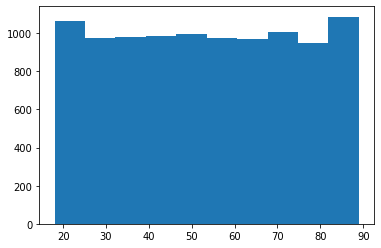

In [17]:
#viewing distribution of age
plt.hist(df['Age'])

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([ 1.00198092,  8.09993183, 15.19788274, 22.29583364, 29.39378455,
        36.49173546, 43.58968637, 50.68763728, 57.78558818, 64.88353909,
        71.98149   ]),
 <a list of 10 Patch objects>)

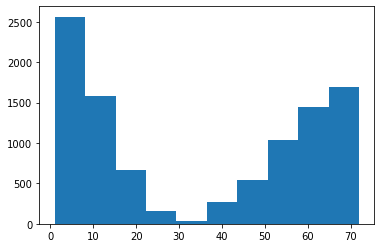

In [18]:
#viewing distribution of initial_days
plt.hist(df['Initial_days'])

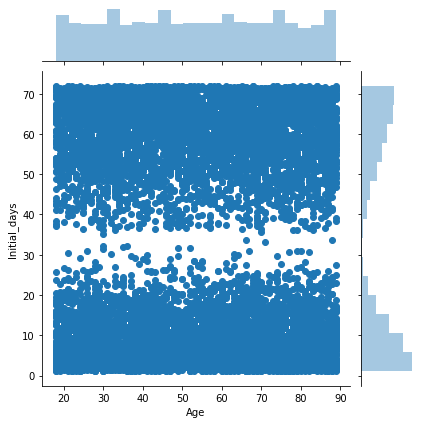

In [19]:
#looking at age and initial_days
sB.jointplot(df['Age'], df['Initial_days'])

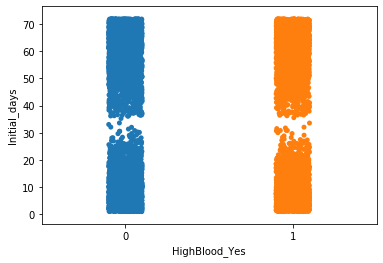

In [20]:
sB.stripplot(df['HighBlood_Yes'], df['Initial_days'])

In [21]:
#writing to csv
df.to_csv('medical_cleaned.csv')

# # Part IV: Model Comparison

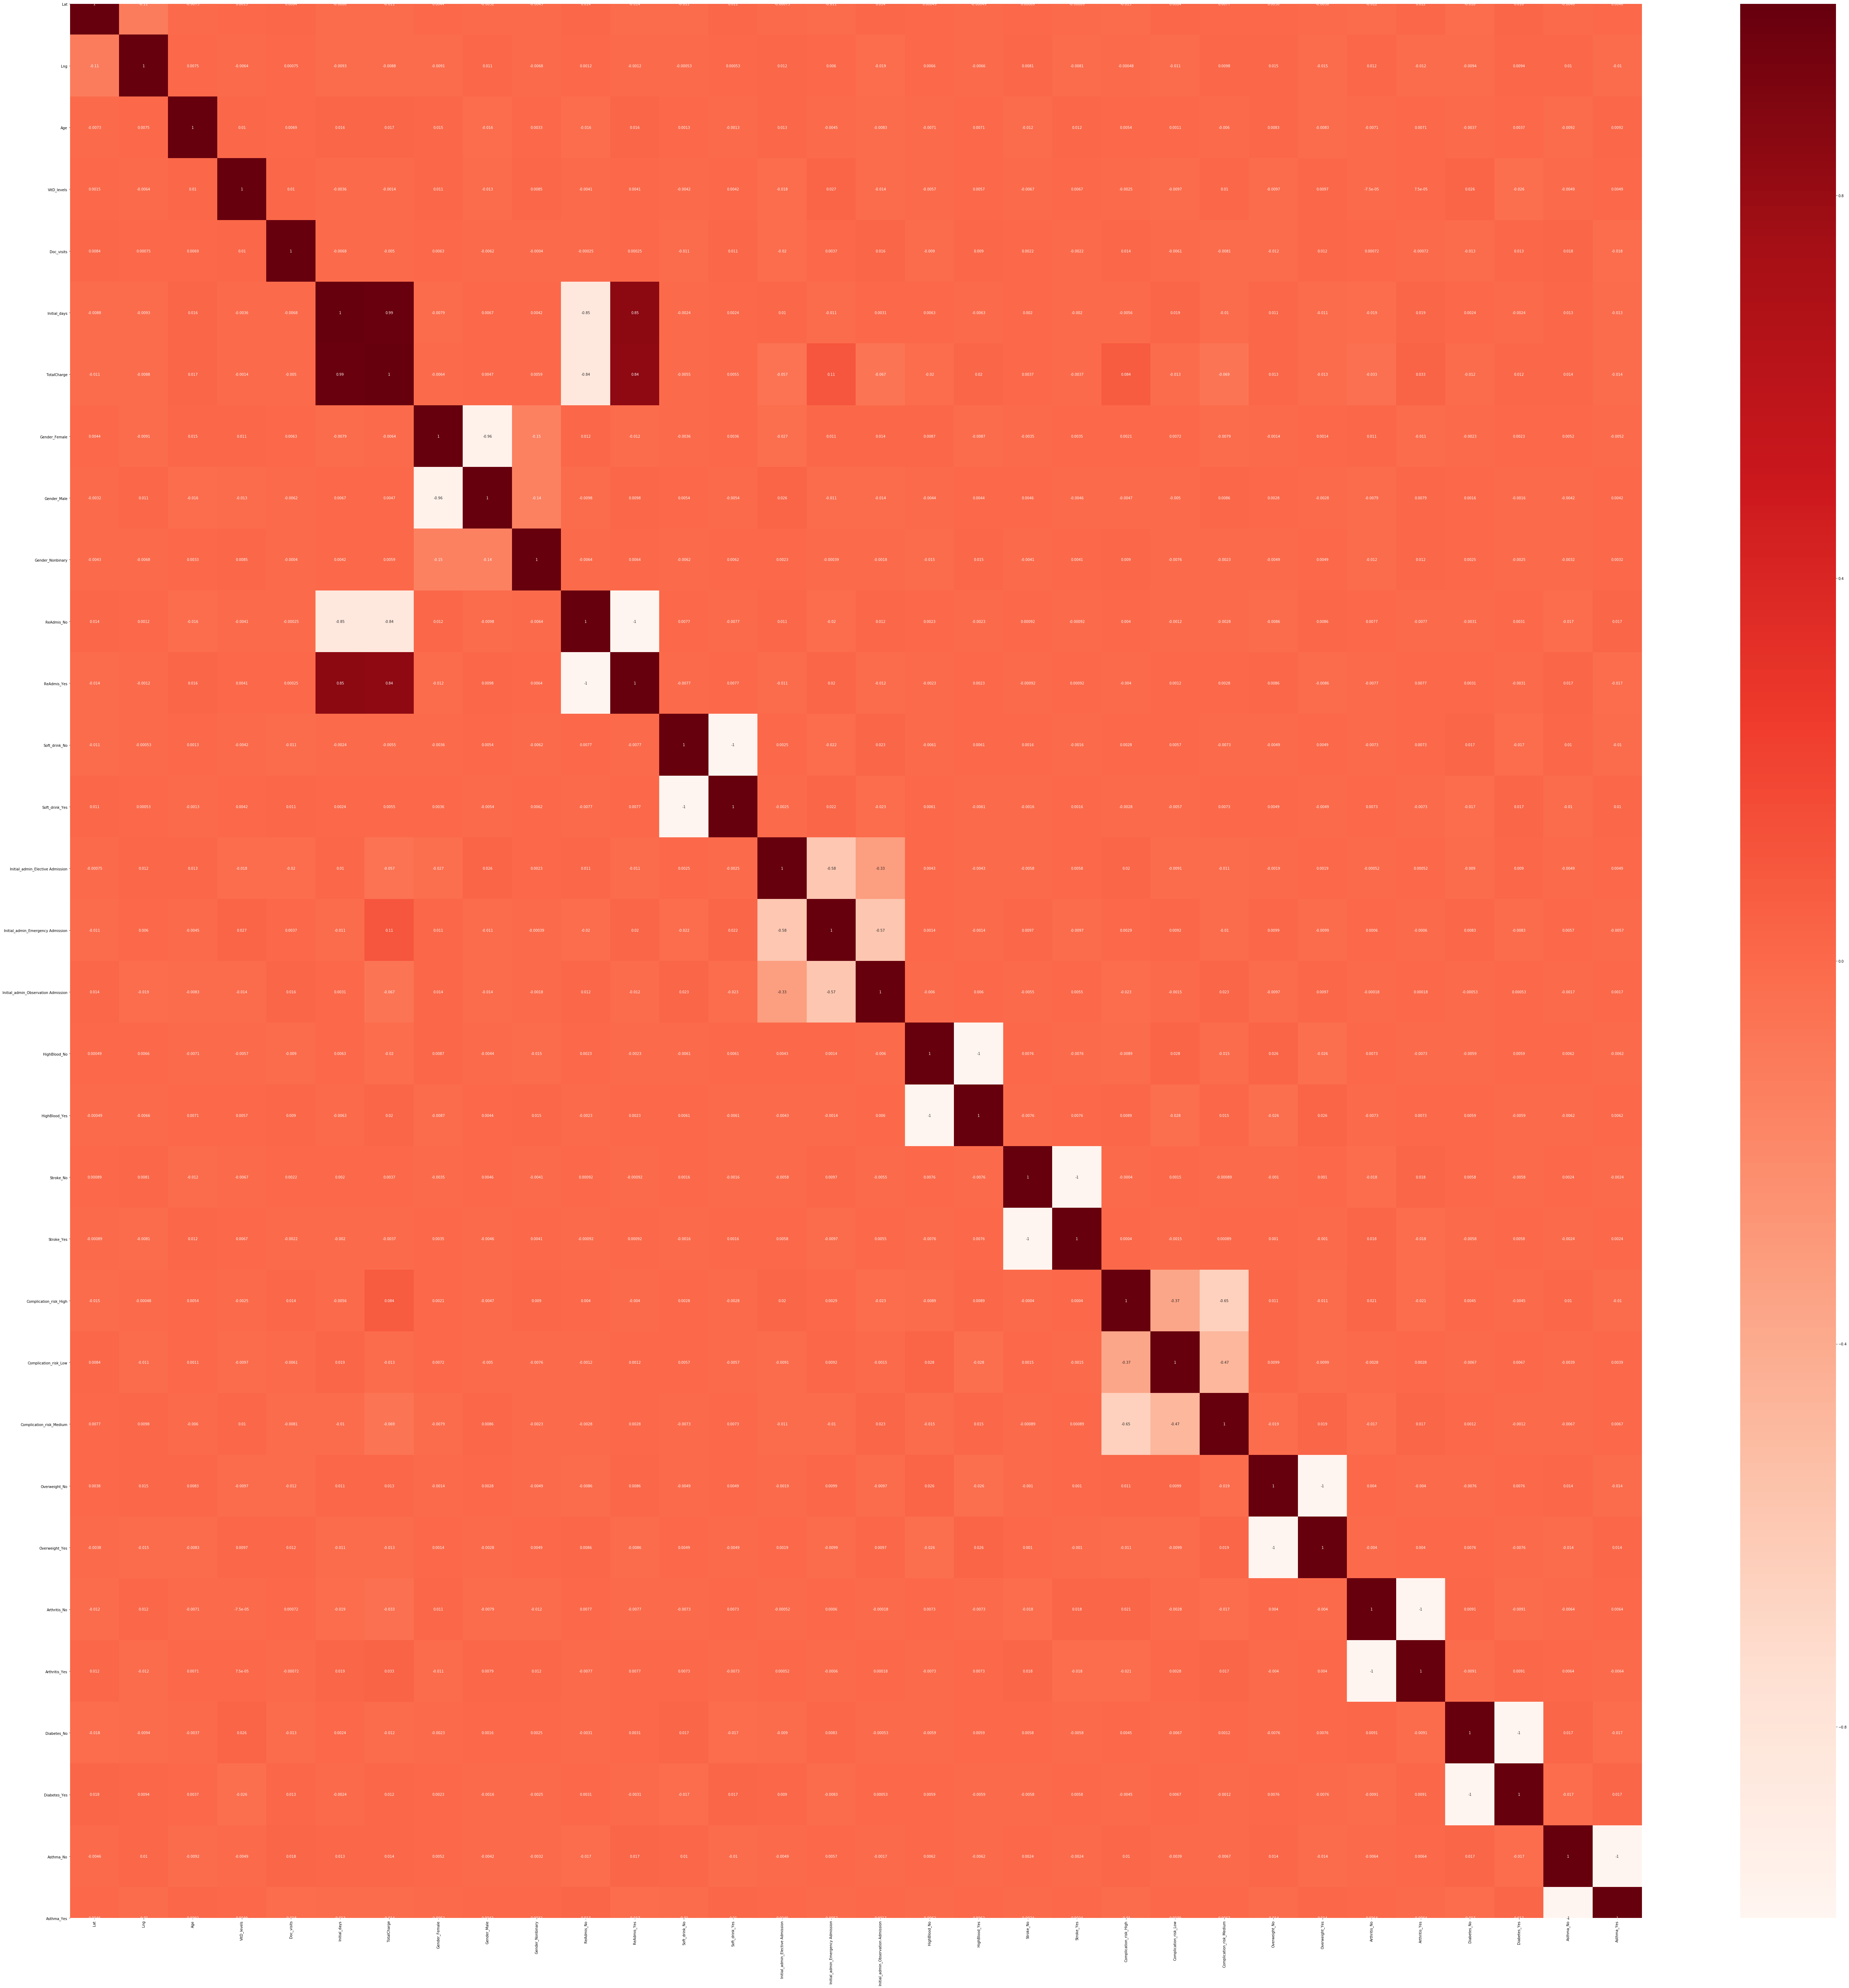

In [22]:
##Visualizing correlations
plt.figure(figsize=(100,100))
cor = df.corr()
sB.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [23]:
df.dtypes

Lat                                    float64
Lng                                    float64
Age                                      int64
VitD_levels                            float64
Doc_visits                               int64
Initial_days                           float64
TotalCharge                            float64
Gender_Female                            uint8
Gender_Male                              uint8
Gender_Nonbinary                         uint8
ReAdmis_No                               uint8
ReAdmis_Yes                              uint8
Soft_drink_No                            uint8
Soft_drink_Yes                           uint8
Initial_admin_Elective Admission         uint8
Initial_admin_Emergency Admission        uint8
Initial_admin_Observation Admission      uint8
HighBlood_No                             uint8
HighBlood_Yes                            uint8
Stroke_No                                uint8
Stroke_Yes                               uint8
Complication_

In [24]:
#declaring independent variables 
X = df[['Soft_drink_Yes','Stroke_Yes', 'Overweight_Yes', 'Diabetes_Yes', 'Asthma_Yes', 'Age', 
        'VitD_levels', 'Lat', 'Lng', 'Gender_Male', 'Gender_Female', 'ReAdmis_Yes', 
'Doc_visits', 'Initial_admin_Emergency Admission', 'Initial_admin_Elective Admission', 
        'Complication_risk_High']]

In [25]:
X = sm.add_constant(X)

C:\Users\jack\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
#declaring dependent variable
Y = df[['Initial_days']] 

In [27]:
#setting up initial model and viewing summary statistics
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1645.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:50:23   Log-Likelihood:                -40433.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9983   BIC:                         8.102e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [28]:
#setting up linear model to use for predictions
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#using model to make predictions 
initial_predictions = [ ]
initial_predictions = regr.predict(X)
print(initial_predictions)

[[16.57793736]
 [16.58623048]
 [18.68180686]
 ...
 [64.66981941]
 [63.16835836]
 [64.49648256]]


In [30]:
#creating list for dependent variable
initial_days_list = df['Initial_days']

In [31]:
#creating program to calculate residual error
def RSE(initial_predictions, initial_days_list):
    y_true = np.array(initial_days_list)
    y_predicted = np.array(initial_predictions)
    RSS = np.sum(np.square(y_true - y_predicted))
    rse = math.sqrt(RSS / len(y_true - 2))
    print(rse)

In [32]:
#converting lists to arrays 
y_true = np.array(initial_days_list)
y_predicted = np.array(initial_predictions)

In [33]:
#calculating residual standard error
print(RSE(y_true, y_predicted))

3455.2609750170973
None


# Creating reduced model 

In [34]:
#reviewing model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1645.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:50:24   Log-Likelihood:                -40433.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9983   BIC:                         8.102e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.5097      2.147      8.623      0.000      14.302      22.718
Soft_drink_Yes                       -0.2109      0.316     -0.667      0.505      -0.830       0.409
Stroke_Yes                           -0.2087      0.346     -0.604      0.546      -0.886       0.469
Overweight_Yes                       -0.2333      0.304     -0.767      0.443      -0.830       0.363
Diabetes_Yes                         -0.0056      0.310     -0.018      0.986      -0.613       0.602
Asthma_Yes                            0.0471      0.305      0.155      0.877      -0.550       0.645
Age                                   0.0036      0.007      0.531      0.596      -0.010       0.017
VitD_levels                          -0.0824      0.069     -1.202      0.229      -0.217       0.052
Lat                                   0.0111      0.026      0.431      0.666      -0.039       0.062
Lng                                  -0.0139      0.009     -1.517      0.129      -0.032       0.004
Gender_Male                           0.1612      0.965      0.167      0.867      -1.731       2.053
Gender_Female                         0.2828      0.964      0.293      0.769      -1.607       2.172
ReAdmis_Yes                          46.4768      0.287    162.102      0.000      45.915      47.039
Doc_visits                           -0.1670      0.132     -1.264      0.206      -0.426       0.092
Initial_admin_Emergency Admission    -1.3278      0.341     -3.895      0.000      -1.996      -0.659
Initial_admin_Elective Admission      0.2720      0.393      0.691      0.489      -0.499       1.043
Complication_risk_High               -0.1223      0.293     -0.418      0.676      -0.696       0.451
==============================================================================
Omnibus:                     1968.431   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3349.392
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       3.997   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##The variables with p values under the significance level of 0.05 are ReAdmis_Yes and Initial_admin_emergency admission

##Stating reduced model 

In [35]:
#selecting kept variables
X = df[['ReAdmis_Yes', 'Initial_admin_Emergency Admission']]

In [36]:
X = sm.add_constant(X)

C:\Users\jack\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jack\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
#defining dependent variable
Y = df[['Initial_days']]

In [38]:
reduced_model = sm.OLS(endog = Y, exog = X).fit()
reduced_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:50:24   Log-Likelihood:                -40438.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9997   BIC:                         8.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.1525      0.221     81.962      0.000      17.718      18.587
ReAdmis_Yes                          46.4751      0.286    162.231      0.000      45.914      47.037
Initial_admin_Emergency Admission    -1.4801      0.276     -5.359      0.000      -2.021      -0.939
==============================================================================
Omnibus:                     1976.467   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3370.443
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#writing equation for line
Initial_days = (46.48*ReAdmis_yes) + (-1.48*Initial_admin_Emergency Admission) + 18.15

In [39]:
#creating list with dependent variable
initial_days = df['Initial_days']

In [40]:
#using model to make predictions
predictions = [ ]
predictions = reduced_model.predict(X)
print(predictions)

0       16.672450
1       16.672450
2       18.152507
3       18.152507
4       18.152507
          ...    
9995    16.672450
9996    64.627571
9997    64.627571
9998    63.147515
9999    64.627571
Length: 10000, dtype: float64


In [41]:
#creating program to calculate residual error
def RSE(predictions, initial_days):
    y_true = np.array(initial_days)
    y_predicted = np.array(predictions)
    RSS = np.sum(np.square(y_true - y_predicted))
    rse = math.sqrt(RSS / len(y_true - 2))
    print(rse)

In [42]:
#converting lists to arrays
y_true = np.array(initial_days)
y_predicted = np.array(predictions)

In [43]:
#getting residual error
print(RSE(y_true, y_predicted))

13.802156530447633
None


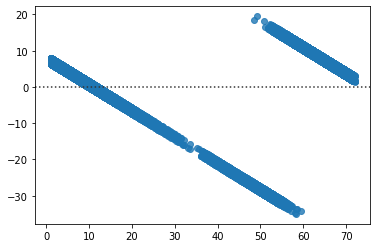

In [44]:
sB.residplot(x = y_true, y = y_predicted)